### Load packages

In [2]:
import os
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')

In [ ]:
##Import packages

import anndata as ad
import scimap as sm
import importlib

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools
import umap as um

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

import hetmel as hm

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

### Set up files, directories, variables

Set and go to project directory 

In [4]:
project_dir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/"
case_number = "Case3-7"
print(case_number)
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
savedir= "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/"

Case3-7


Variables 

In [ ]:
phenotype = pd.read_csv('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/20250408_phenotyping_workflow_allcombinations.csv')
image_path="/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/Case3-7/background/Case3-7_final.ome.tif"
feature_table_path = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case4-2/Case4-2_feature-extraction.csv"

### Read in data

In [ ]:
adata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case3-7/Case3-7_tumor_adata_v2.h5ad')

### Write data

In [ ]:
#write adata to a file
case_number='Case1-38'
Case1_tumor_adata_subset.write(project_dir + case_number + '/' + case_number +'_tumor_adata_subset_cluster.h5ad')

Set marker subset variables 

In [5]:
#Marker subsets
AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','AXL','SOX9','NGFR']

Create layers to save log raw data and zscore of the log raw data

In [ ]:
adata


AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'

In [ ]:

adata.layers["log1p_raw"] = np.log1p(adata.raw.X) #log layer
adata.layers["zscore"] = stats.zscore(adata.layers["log1p_raw"], axis = 0) #z score log layer
adata

AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'zscore'

Read in all 4 tumor_adata

In [242]:
Case1_tumor_adata = ad.read_h5ad(project_dir +"/Case1-38/Case1-38_tumor_adata_v2.h5ad")
Case2_tumor_adata = ad.read_h5ad(project_dir +"/Case2-7/Case2-7_tumor_adata_v2.h5ad")
Case3_tumor_adata = ad.read_h5ad(project_dir +"/Case3-7/Case3-7_AP1gated_v4.h5ad")
Case4_tumor_adata = ad.read_h5ad(project_dir +"/Case4-2/Case4-2tumor_v5_AP1gated.h5ad")

Z-score raw intensity based on tumor adata subset, instead of literally all the cells. Save new z-score as tumor_zscore in adata.obs

Subset tumor adata further to exclude phenotypes that are below a certain threshold of prevalence

In [245]:
Case1_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case1_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case2_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case2_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case3_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case3_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case4_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case4_tumor_adata, threshold=0.01, verbose=False, return_adata=True)

In [8]:
tumor_adata_list = [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]
# Compute z-scores and assign them to a new layer
for i in tumor_adata_list:
    i.layers['tumor_zscore'] = stats.zscore(i.layers["log1p_raw"], axis=0
)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_30952/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_30952/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_30952/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_30952/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.



Matrices of phenotype data from tumor_adata_subsets

In [10]:
#1 = MITF; 2 = SOX10; 3 = PRAME; 4 = NGFR; 5 = SOX9; 6 = AXL

Case3_matrix = np.array([
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 2, 3, 4, 0, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 3, 0, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 0, 3, 4, 0, 0],
    [1, 2, 0, 4, 0, 0],
    [1, 0, 0, 4, 0, 0],
    [1, 0, 3, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0]
])

Case1_matrix = np.array([
    [1, 2, 0, 4, 5, 0],
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 3, 0, 5, 0]
])

Case2_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [1, 2, 3, 0, 5, 0],
    [0, 2, 3, 0, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0]
])

Case4_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 4, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [0, 2, 3, 4, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [0, 2, 3, 4, 5, 6],
    [0, 2, 0, 4, 5, 6]
])

Generate arrays containing only unique rows and only duplicate rows

In [16]:
# Join all arrays and remove duplicate rows

all_matrices = np.vstack([
    Case1_matrix,
    Case2_matrix,
    Case3_matrix,
    Case4_matrix
])

# Find duplicate rows
_, unique_indices = np.unique(all_matrices, axis=0, return_index=True)
all_indices = np.arange(all_matrices.shape[0])
duplicate_indices = np.setdiff1d(all_indices, unique_indices)
duplicate_matrix = all_matrices[duplicate_indices]

# Remove duplicate rows
# np.unique with axis=0 returns unique rows
unique_matrix = np.unique(all_matrices, axis=0)

print("Unique rows shape:",unique_matrix.shape)
unique_matrix_binary = (unique_matrix > 0).astype(int)
duplicate_matrix_binary = (duplicate_matrix > 0).astype(int)
print("Duplicate rows shape:", duplicate_matrix.shape)



Unique rows shape: (23, 6)
Duplicate rows shape: (19, 6)


In [19]:
print(unique_matrix_binary)

[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 1 0]
 [0 1 0 1 0 0]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 1 0 0]
 [1 0 1 0 0 0]
 [1 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 1 0]
 [1 1 0 1 0 0]
 [1 1 0 1 1 0]
 [1 1 1 0 0 0]
 [1 1 1 0 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 1 0]]


In [ ]:
print(duplicate_matrix_binary)

[[1 0 0 0 0 0]
 [1 1 1 0 1 0]
 [0 1 1 0 1 0]
 [1 1 0 0 1 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 1 1 0]
 [1 1 1 0 1 0]
 [1 1 1 0 0 0]
 [1 1 0 0 1 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 0]
 [0 1 0 1 1 0]]


## Hierarchical Clustering

Run hierarchical clustering on unique matrix. Save linkage variable and row order

In [ ]:
row_linkage = linkage(unique_matrix_binary, method='complete', metric='euclidean')
row_order = leaves_list(row_linkage)
unique_matrix_binary_ordered = unique_matrix_binary[row_order]



In [ ]:
if showPrevalence:
            # Calculate text offset from the last column of the heatmap
            text_offset = (
                mean_data.shape[1] * 0.001
            )  # Small offset from the right edge of the heatmap
            total_cells = sum(category_counts)

            for index, count in enumerate(category_counts):
                percentage = (count / total_cells) * 100
                # Position text immediately to the right of the heatmap
                ax.text(
                    mean_data.shape[1] + text_offset,
                    index,
                    f"n={count} ({percentage:.1f}%)",
                    va='center',
                    ha='left',
                )

In [ ]:

def plot_dend_with_grid(matrix, dend_threshold=None, colors= None, figsize=(10, 6), marker_names=markers,
                        fileName='dendrogram_with_grid.png', saveDir=None, return_clusters=False):
    fig = plt.figure(figsize=figsize)
    spec = plt.GridSpec(nrows=2, ncols=2, 
                    width_ratios=[1,0.5,],    
                    wspace=0.05,
                    figure=fig)

    ax_row_dendro = fig.add_subplot(spec[1, 0])
    
    
    row_linkage = linkage(matrix, method='complete', metric='euclidean')
    row_order = leaves_list(row_linkage)
    matrix_ordered = matrix[row_order]
    if dend_threshold is not None:
        dendrogram(row_linkage, orientation='left', ax=ax_row_dendro, color_threshold=dend_threshold)
    else:
        dendrogram(row_linkage, orientation='left', ax=ax_row_dendro)
   
    ax_row_dendro.set_xticks([])
    ax_row_dendro.set_yticks([])
    
    if colors == None: 
        colors=['white','black', 'black','black','black','black','black']
    else:
        colors = colors
        
    bounds=[0, 1 , 2, 3,4,5,6,7]
    from matplotlib import colors as mplt
    cmap = mplt.ListedColormap(colors)
    norm = mplt.BoundaryNorm(bounds, cmap.N)

    ax_grid= fig.add_subplot(spec[1, 1])

    ax_grid.axis('on')
        
    ax_grid.imshow(matrix_ordered, cmap=cmap, norm= norm, aspect='auto', extent=[0, unique_matrix_ordered.shape[1], 0, unique_matrix_ordered.shape[0]])

    # remove tick labels
    ax_grid.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False) 

    ax_grid.set_xticks(np.arange(0, matrix_ordered.shape[1] + 1, 1), minor=False)
    ax_grid.set_yticks(np.arange(0, matrix_ordered.shape[0] + 1, 1), minor=False)
    ax_grid.grid(which="major", color="grey", linestyle='-', linewidth=1)
    ax_grid.tick_params(which="major", size=0, labelbottom=False, labelleft=False)
        

    # column labels
    columnlabels = markers
    for i, label in enumerate(columnlabels):    
        ax_grid.text(i + 0.5, matrix_ordered.shape[0] + 0.3, label, ha='center', va='bottom', rotation=90, fontsize=10)
    
    if return_clusters:
        cluster_labels = fcluster(row_linkage, t=dend_threshold, criterion='distance')
        cluster_labels_ordered = cluster_labels[row_order]
        cluster_labels_reversed = cluster_labels_ordered[::-1]
        return cluster_labels_reversed
    
    if saveDir:
        if not os.path.exists(saveDir):
            os.makedirs(saveDir)
        full_path = os.path.join(saveDir, fileName)
        plt.savefig(full_path, bbox_inches='tight', pad_inches=0.1,dpi=300)
        plt.close(fig)
        print(f"Saved plot to {full_path}")
    
    else:
        plt.show()

set threshold for cluster analysis

In [ ]:
thresh = 1.8

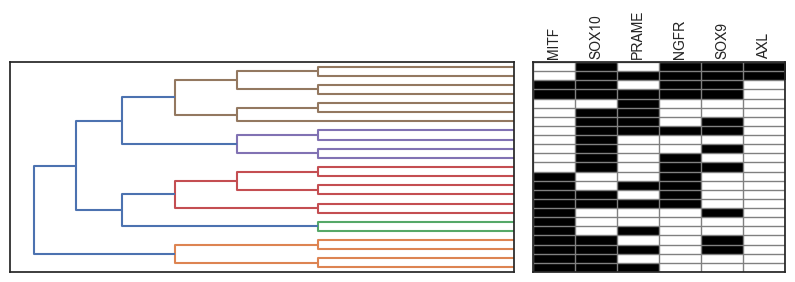

In [ ]:
cluster_labels = plot_dend_with_grid(unique_matrix_binary, marker_names = Diff_state_markers,dend_threshold=thresh,return_clusters=True)

Cluster 1: MITF+ SOX10+ NGFR-
Cluster 2: MITF+ SOX10- NGFR- SOX9- 
Cluster 3: MITF+ NGFR+ 
Cluster 4: MITF- SOX10+
Cluster 5: SOX10+ NGFR+ SO 

In [144]:
cluster_labels

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1,
       1], dtype=int32)

In [ ]:
row_linkage = linkage(unique_matrix_binary, method='complete', metric='euclidean')
row_order = leaves_list(row_linkage)

unique_matrix_binary_ordered = unique_matrix_binary[row_order]
cluster_labels = fcluster(row_linkage, t=thresh, criterion='distance')
cluster_labels_ordered = cluster_labels[row_order]
cluster_labels_reversed = cluster_labels_ordered[::-1]

In [252]:
unique_matrix_binary_ordered

array([[0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

In [253]:
cluster_labels_reversed

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1,
       1], dtype=int32)

In [44]:
def translate_matrix_to_phenotypes(matrix, markers, count=False):
    

    # Function to convert a row to phenotype string
    def row_to_phenotype(row, markers):
        phenotype = []
        for val, marker in zip(row, markers):
            if val == 0:
                phenotype.append(f"{marker}-")
            else:
                phenotype.append(f"{marker}+")
        return " ".join(phenotype)

    # Convert all rows in matrix to phenotype strings
    phenotype_array = [row_to_phenotype(row, markers) for row in matrix]

 
    if count == True:
        # Print counts for each repeating phenotype
        from collections import Counter
        counts = Counter(phenotype_array)
        print("\nPhenotype counts:")
        for pheno, count in counts.most_common():
            print(f"{pheno}: {count}")
    else:
           # Display the phenotype array
        return phenotype_array

In [53]:
# Define marker names for each column
markers = ['MITF', 'SOX10', 'PRAME', 'NGFR', 'SOX9', 'AXL']

unique_matrix_phenotypes = translate_matrix_to_phenotypes(unique_matrix_binary_ordered, markers, count=False)

In [54]:
unique_matrix_phenotypes

['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+',
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+',
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-',
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-',
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-',
 'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-',
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-',
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-',
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-',
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-',
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-',
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-',
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-',
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-',
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-',
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-',
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-',
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-',
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-',
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-',
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-']

In [155]:
total_cells = combined_tumor_adata.shape[0]
total_cells

418971

In [157]:

phenotype_counts = []
for pheno in unique_matrix_phenotypes:
    count = (combined_tumor_adata['phenotype'] == pheno).sum()
    phenotype_counts.append({'phenotype': pheno, 'cell_count': count, 'percent_of_total_cells': (count/combined_tumor_adata.shape[0]) * 100},)

# Create a new DataFrame with the results
phenotype_count_df = pd.DataFrame(phenotype_counts)
phenotype_count_df.insert(0, 'cluster', cluster_labels_reversed)

print(phenotype_count_df)

    cluster                             phenotype  cell_count  \
0         5  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+         795   
1         5  MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+         400   
2         5  MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-         709   
3         5  MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-        8629   
4         5  MITF- SOX10- PRAME+ NGFR- SOX9- AXL-        3741   
5         5  MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-        9341   
6         5  MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-       11747   
7         4  MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-        2771   
8         4  MITF- SOX10+ PRAME- NGFR- SOX9- AXL-       18703   
9         4  MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-       40739   
10        4  MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-        1578   
11        3  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-        7973   
12        3  MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-        2558   
13        3  MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-        2521   
14        3  MITF+ SOX10+

In [162]:
# Calculate cluster cell counts and percent of total cells per cluster
cluster_summary = (
    phenotype_count_df
    .groupby('cluster')
    .agg(cluster_cell_count=('cell_count', 'sum'))
    .reset_index()
)
cluster_summary['percent_of_total_cells'] = (cluster_summary['cluster_cell_count'] / combined_tumor_adata.shape[0]) * 100

print(cluster_summary)

   cluster  cluster_cell_count  percent_of_total_cells
0        1              258653               61.735299
1        2               26632                6.356526
2        3               34533                8.242337
3        4               63791               15.225636
4        5               35362                8.440202


In [32]:
Case2_tumor_adata_subset

AnnData object with n_obs × n_vars = 207791 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'ROI', 'phenotype_category'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore', 'tumor_zscore'

In [55]:
# Combine Case1,2,3,4 tumor adata subsets into a single DataFrame
# Preserve cell ID (index), phenotype, and add a Case_id column

# List of (adata, case_id) tuples
tumor_adata_subsets = [
    (Case1_tumor_adata_subset, "Case1-38"),
    (Case2_tumor_adata_subset, "Case2-7"),
    (Case3_tumor_adata_subset, "Case3-7"),
    (Case4_tumor_adata_subset, "Case4-2"),
]

dfs = []
for adata, case_id in tumor_adata_subsets:
    df = adata.obs[['phenotype']].copy()
    df['CellID'] = df.index
    df['CaseID'] = case_id
    dfs.append(df)

combined_tumor_adata = pd.concat(dfs, ignore_index=True)
combined_tumor_adata

,phenotype,CellID,CaseID
0,MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_25,Case1-38
1,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Case1-38_R1_feature-extraction_31,Case1-38
2,MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-,Case1-38_R1_feature-extraction_36,Case1-38
3,MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_45,Case1-38
4,MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-,Case1-38_R1_feature-extraction_52,Case1-38
...,...,...,...
418966,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+,Case4-2_feature-extraction_86974,Case4-2
418967,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Case4-2_feature-extraction_87006,Case4-2
418968,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,Case4-2_feature-extraction_87039,Case4-2
418969,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,Case4-2_feature-extraction_87162,Case4-2


In [236]:

# Find the minimum number of cells across all cases
min_cells = combined_tumor_adata['CaseID'].value_counts().min()

# Subsample each case to min_cells
subsampled_dfs = []
for case in combined_tumor_adata['CaseID'].unique():
    case_df = combined_tumor_adata[combined_tumor_adata['CaseID'] == case]
    subsampled_df = case_df.sample(n=min_cells, random_state=0)
    subsampled_dfs.append(subsampled_df)

# Concatenate subsampled dataframes
combined_tumor_adata_sub = pd.concat(subsampled_dfs, ignore_index=True)

# Now use combined_tumor_adata_sub for your cluster summary
clusters = phenotype_count_df['cluster'].unique()
case_ids = combined_tumor_adata_sub['CaseID'].unique()



,cluster,total_cells,percent_of_cluster_Case1-38,percent_of_cluster_Case2-7,percent_of_cluster_Case3-7,percent_of_cluster_Case4-2
0,5,3857,37.334716,12.315271,26.212082,24.137931
1,4,7422,29.385610,26.812180,4.648343,39.153867
2,3,6311,5.403264,0.000000,19.061955,75.534781
3,2,1705,28.152493,20.821114,44.985337,6.041056
4,1,15533,27.457671,37.899955,34.642374,0.000000


In [237]:
# Calculate percent of each cluster represented in each case

clusters = phenotype_count_df['cluster'].unique()
case_ids = combined_tumor_adata['CaseID'].unique()

# Prepare summary list
summary = []

for case in case_ids:
    case_total = (combined_tumor_adata_sub['CaseID'] == case).sum()
    row = {'CaseID': case}
    for cluster in clusters:
        # Get phenotypes in this cluster
        phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
        # Filter cells for these phenotypes and this case
        n_cells = combined_tumor_adata_sub[
            (combined_tumor_adata_sub['phenotype'].isin(phenos)) &
            (combined_tumor_adata_sub['CaseID'] == case)
        ].shape[0]
        percent = (n_cells / case_total) * 100 if case_total > 0 else 0
        row[f'percent_cluster_{cluster}'] = percent
    summary.append(row)

# Create DataFrame
percent_cluster_per_case_df = pd.DataFrame(summary)
percent_cluster_per_case_df.head()

,CaseID,percent_cluster_5,percent_cluster_4,percent_cluster_3,percent_cluster_2,percent_cluster_1
0,Case1-38,16.538417,25.048811,3.916389,5.512806,48.983576
1,Case2-7,5.455381,22.855174,0.000000,4.077179,67.612266
2,Case3-7,11.611347,3.962329,13.816470,8.809004,61.800850
3,Case4-2,10.692546,33.375445,54.749052,1.182956,0.000000


In [241]:
percent_case_per_cluster_df.to_csv(savedir + 'percent_case_per_cluster_df.csv', index=False)
percent_cluster_per_case_df.to_csv(savedir + 'percent_cluster_per_case_df.csv', index=False)

In [202]:
# Transpose case_cluster_percent_df so clusters are rows and cases are columns
case_cluster_percent_T = case_cluster_percent_df.set_index('CaseID').T

# Only keep rows that start with 'percent_cluster_'
case_cluster_percent_T = case_cluster_percent_T[case_cluster_percent_T.index.str.startswith('percent_cluster_')]

# Clean up the index to just cluster numbers
case_cluster_percent_T.index = case_cluster_percent_T.index.str.replace('percent_cluster_', '').astype(int)
case_cluster_percent_T = case_cluster_percent_T.sort_index()

# Rename columns to 'percent_of_{case}_cells'
case_id_map = {case: f'percent_of_{case}_cells' for case in case_cluster_percent_df['CaseID']}
case_cluster_percent_T.columns = [case_id_map.get(col, col) for col in case_cluster_percent_T.columns]

# Merge with cluster_case_summary
final_summary = cluster_case_summary.merge(
    case_cluster_percent_T,
    left_on='cluster',
    right_index=True,
    how='left'
)

final_summary.head()



,cluster,total_cells,percent_of_cluster_Case1-38,percent_of_cluster_Case2-7,percent_of_cluster_Case3-7,percent_of_cluster_Case4-2,percent_of_Case1-38_cells,percent_of_Case2-7_cells,percent_of_Case3-7_cells,percent_of_Case4-2_cells
0,5,35362,4.072168,32.905379,58.667496,4.354957,16.538417,5.599858,11.031527,10.685540
1,4,63791,3.418978,76.448088,12.509602,7.623332,25.048811,23.469255,4.243304,33.742714
2,3,34533,0.987461,0.000000,76.309617,22.702922,3.916389,0.000000,14.012475,54.399112
3,2,26632,1.802343,34.927906,62.635176,0.634575,5.512806,4.476614,8.869994,1.172634
4,1,258653,1.648927,53.386584,44.964489,0.000000,48.983576,66.454274,61.842700,0.000000


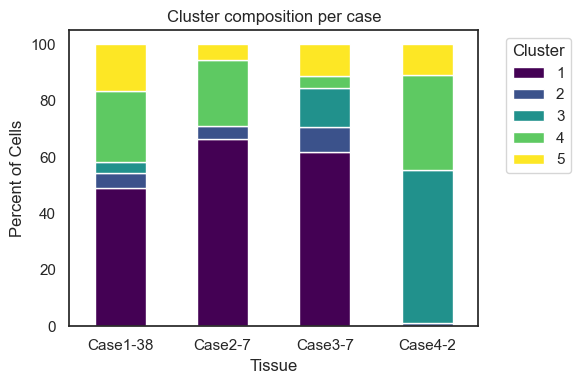

In [190]:
import matplotlib.pyplot as plt

# Transpose so clusters are x-axis, cases are stacked bars
df_plot = case_cluster_percent_df.set_index('CaseID').T

# Only keep rows that start with 'percent_cluster_'
df_plot = df_plot[df_plot.index.str.startswith('percent_cluster_')]

# Clean up the index to just cluster numbers
df_plot.index = df_plot.index.str.replace('percent_cluster_', '').astype(int)
df_plot = df_plot.sort_index()

# Plot
df_plot.T.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    colormap='viridis',
    rot=0
)
plt.ylabel('Percent of Cells')
plt.xlabel('Tissue', )
plt.title('Cluster composition per case')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [192]:
cluster_summary.head()

,cluster,total_cells,percent_of_cluster_Case1-38,percent_of_cluster_Case2-7,percent_of_cluster_Case3-7,percent_of_cluster_Case4-2
0,5,35362,4.072168,32.905379,58.667496,4.354957
1,4,63791,3.418978,76.448088,12.509602,7.623332
2,3,34533,0.987461,0.000000,76.309617,22.702922
3,2,26632,1.802343,34.927906,62.635176,0.634575
4,1,258653,1.648927,53.386584,44.964489,0.000000


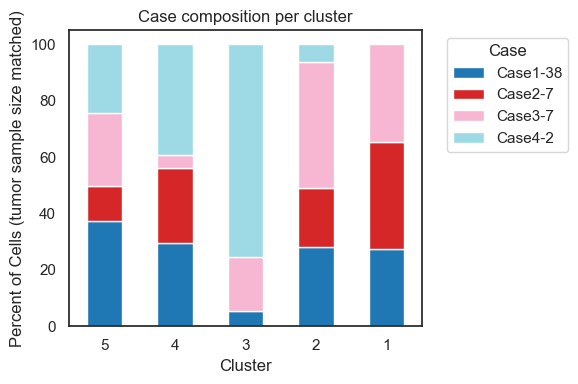

In [201]:
df_plot = cluster_summary2.set_index('cluster')

# Select only columns that start with 'percent_of_cluster_'
case_cols = [col for col in df_plot.columns if col.startswith('percent_of_cluster_')]
df_plot = df_plot[case_cols]

# Clean up column names for legend
df_plot.columns = [col.replace('percent_of_cluster_', '') for col in df_plot.columns]

# Plot: clusters on x, cases as stacked bars
df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    colormap='tab20',
    rot=0
)
plt.ylabel('Percent of Cells (tumor sample size matched)')
plt.xlabel('Cluster')
plt.title('Case composition per cluster')
plt.legend(title='Case', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [205]:
final_summary.head()
print(final_summary.columns)

Index(['cluster', 'total_cells', 'percent_of_cluster_Case1-38',
       'percent_of_cluster_Case2-7', 'percent_of_cluster_Case3-7',
       'percent_of_cluster_Case4-2', 'percent_of_Case1-38_cells',
       'percent_of_Case2-7_cells', 'percent_of_Case3-7_cells',
       'percent_of_Case4-2_cells'],
      dtype='object')


In [206]:
# Assume final_summary has clusters as rows and columns like 'percent_of_Case1-38_cells'
# and case_cluster_percent_df has cases as rows and columns like 'percent_cluster_1', etc.

# Get cluster and case IDs
clusters = final_summary['cluster']
case_ids = combined_tumor_adata['CaseID'].unique()

# Build the table
table = pd.DataFrame(index=clusters, columns=case_ids)

for case in case_ids:
    # % of cluster from this case (case composition per cluster)
    cluster_per_case = final_summary[f'percent_of_{case}_cells'].values
    # % of case in this cluster (cluster composition per case)
    # Find the right column in case_cluster_percent_df
    for i, cluster in enumerate(clusters):
        try:
            case_row = case_cluster_percent_df[case_cluster_percent_df['CaseID'] == case]
            case_in_cluster = case_row[f'percent_cluster_{cluster}'].values[0]
        except Exception:
            case_in_cluster = np.nan
        # Format as requested
        table.loc[cluster, case] = f"{cluster_per_case[i]:.1f}% (of Clust.)\n{case_in_cluster:.1f}% (of Case)"

table.index.name = 'Cluster'
table

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,16.5% (of Clust.)\n16.5% (of Case),5.6% (of Clust.)\n5.6% (of Case),11.0% (of Clust.)\n11.0% (of Case),10.7% (of Clust.)\n10.7% (of Case)
4,25.0% (of Clust.)\n25.0% (of Case),23.5% (of Clust.)\n23.5% (of Case),4.2% (of Clust.)\n4.2% (of Case),33.7% (of Clust.)\n33.7% (of Case)
3,3.9% (of Clust.)\n3.9% (of Case),0.0% (of Clust.)\n0.0% (of Case),14.0% (of Clust.)\n14.0% (of Case),54.4% (of Clust.)\n54.4% (of Case)
2,5.5% (of Clust.)\n5.5% (of Case),4.5% (of Clust.)\n4.5% (of Case),8.9% (of Clust.)\n8.9% (of Case),1.2% (of Clust.)\n1.2% (of Case)
1,49.0% (of Clust.)\n49.0% (of Case),66.5% (of Clust.)\n66.5% (of Case),61.8% (of Clust.)\n61.8% (of Case),0.0% (of Clust.)\n0.0% (of Case)


In [211]:
def style_cluster_case_table(table):
    styled = (
        table.style
        .set_properties(**{
            'white-space': 'pre',      # preserve line breaks
            'text-align': 'center',    # center text
            'font-size': '13px',       # larger font
            'font-family': 'monospace' # monospace for alignment
        })
        .set_caption("Cluster/Case Composition Table")
    )
    return styled

styled_table = style_cluster_case_table(table)
styled_table

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,4.1% (of Clust.) 16.5% (of Case),32.9% (of Clust.) 5.6% (of Case),58.7% (of Clust.) 11.0% (of Case),4.4% (of Clust.) 10.7% (of Case)
4,3.4% (of Clust.) 25.0% (of Case),76.4% (of Clust.) 23.5% (of Case),12.5% (of Clust.) 4.2% (of Case),7.6% (of Clust.) 33.7% (of Case)
3,1.0% (of Clust.) 3.9% (of Case),0.0% (of Clust.) 0.0% (of Case),76.3% (of Clust.) 14.0% (of Case),22.7% (of Clust.) 54.4% (of Case)
2,1.8% (of Clust.) 5.5% (of Case),34.9% (of Clust.) 4.5% (of Case),62.6% (of Clust.) 8.9% (of Case),0.6% (of Clust.) 1.2% (of Case)
1,1.6% (of Clust.) 49.0% (of Case),53.4% (of Clust.) 66.5% (of Case),45.0% (of Clust.) 61.8% (of Case),0.0% (of Clust.) 0.0% (of Case)


In [208]:
print(final_summary[[col for col in final_summary.columns if col.startswith('percent_of_')]])
print(case_cluster_percent_df)

   percent_of_cluster_Case1-38  percent_of_cluster_Case2-7  \
0                     4.072168                   32.905379   
1                     3.418978                   76.448088   
2                     0.987461                    0.000000   
3                     1.802343                   34.927906   
4                     1.648927                   53.386584   

   percent_of_cluster_Case3-7  percent_of_cluster_Case4-2  \
0                   58.667496                    4.354957   
1                   12.509602                    7.623332   
2                   76.309617                   22.702922   
3                   62.635176                    0.634575   
4                   44.964489                    0.000000   

   percent_of_Case1-38_cells  percent_of_Case2-7_cells  \
0                  16.538417                  5.599858   
1                  25.048811                 23.469255   
2                   3.916389                  0.000000   
3                   5.512806

In [209]:
for case in case_ids:
    for i, cluster in enumerate(clusters):
        # Cells in this cluster and case
        n_case_in_cluster = combined_tumor_adata[
            (combined_tumor_adata['CaseID'] == case) &
            (combined_tumor_adata['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            ))
        ].shape[0]
        # Total in cluster
        n_in_cluster = combined_tumor_adata[
            combined_tumor_adata['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            )
        ].shape[0]
        # Total in case
        n_in_case = (combined_tumor_adata['CaseID'] == case).sum()
        # Calculate
        percent_of_cluster = n_case_in_cluster / n_in_cluster * 100 if n_in_cluster > 0 else 0
        percent_of_case = n_case_in_cluster / n_in_case * 100 if n_in_case > 0 else 0
        table.loc[cluster, case] = f"{percent_of_cluster:.1f}% (of Clust.)\n{percent_of_case:.1f}% (of Case)"

In [213]:
for case in case_ids:
    for i, cluster in enumerate(clusters):
        # Use the subsampled DataFrame
        n_case_in_cluster = combined_tumor_adata_sub[
            (combined_tumor_adata_sub['CaseID'] == case) &
            (combined_tumor_adata_sub['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            ))
        ].shape[0]
        n_in_cluster = combined_tumor_adata_sub[
            combined_tumor_adata_sub['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            )
        ].shape[0]
        n_in_case = (combined_tumor_adata_sub['CaseID'] == case).sum()
        percent_of_cluster = n_case_in_cluster / n_in_cluster * 100 if n_in_cluster > 0 else 0
        percent_of_case = n_case_in_cluster / n_in_case * 100 if n_in_case > 0 else 0
        table.loc[cluster, case] = f"{percent_of_cluster:.1f}% (of Clust.)\n{percent_of_case:.1f}% (of Case)"

In [214]:
table

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,37.3% (of Clust.)\n16.5% (of Case),12.3% (of Clust.)\n5.5% (of Case),26.2% (of Clust.)\n11.6% (of Case),24.1% (of Clust.)\n10.7% (of Case)
4,29.4% (of Clust.)\n25.0% (of Case),26.8% (of Clust.)\n22.9% (of Case),4.6% (of Clust.)\n4.0% (of Case),39.2% (of Clust.)\n33.4% (of Case)
3,5.4% (of Clust.)\n3.9% (of Case),0.0% (of Clust.)\n0.0% (of Case),19.1% (of Clust.)\n13.8% (of Case),75.5% (of Clust.)\n54.7% (of Case)
2,28.2% (of Clust.)\n5.5% (of Case),20.8% (of Clust.)\n4.1% (of Case),45.0% (of Clust.)\n8.8% (of Case),6.0% (of Clust.)\n1.2% (of Case)
1,27.5% (of Clust.)\n49.0% (of Case),37.9% (of Clust.)\n67.6% (of Case),34.6% (of Clust.)\n61.8% (of Case),0.0% (of Clust.)\n0.0% (of Case)


In [227]:
import re

# 1. Extract numeric values
def extract_percent(table, which='cluster'):
    # which: 'cluster' or 'case'
    percent_df = table.copy()
    for idx in percent_df.index:
        for col in percent_df.columns:
            val = percent_df.loc[idx, col]
            if isinstance(val, str):
                match = re.findall(r"([\d\.]+)% \(of Clust\.\)\n([\d\.]+)% \(of Case\)", val)
                if match:
                    cluster_val, case_val = map(float, match[0])
                    percent_df.loc[idx, col] = cluster_val if which == 'cluster' else case_val
                else:
                    percent_df.loc[idx, col] = np.nan
    return percent_df.astype(float)


cluster_percent = extract_percent(table, which='cluster').round(1)
case_percent = extract_percent(table, which='case').round(1)

# Style with gradients and format to 1 decimal place (no trailing zeros)
styled_cluster = (
    cluster_percent
    .style
    .background_gradient(cmap='Blues')
    .format("{:.1f}")
    .set_caption('% of Cluster')
)
styled_case = (
    case_percent
    .style
    .background_gradient(cmap='Greens')
    .format("{:.1f}")
    .set_caption('% of Case')
)

from IPython.display import display
display(styled_cluster)
display(styled_case)

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,37.3,12.3,26.2,24.1
4,29.4,26.8,4.6,39.2
3,5.4,0.0,19.1,75.5
2,28.2,20.8,45.0,6.0
1,27.5,37.9,34.6,0.0


,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,16.5,5.5,11.6,10.7
4,25.0,22.9,4.0,33.4
3,3.9,0.0,13.8,54.7
2,5.5,4.1,8.8,1.2
1,49.0,67.6,61.8,0.0


In [240]:
# Export styled_case with gradient to Excel
styled_case.to_excel(savedir+"styled_case_gradient.xlsx")

styled_cluster.to_excel(savedir+"styled_cluster_gradient.xlsx")

In [250]:
# Show some phenotype strings from Case4-2
print(case4_cells['phenotype'].unique())

['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+'
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-'
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+'
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-']


In [251]:
# Find phenotypes in cluster 3 that are NOT present in Case4-2
cluster3_phenos = set(phenotype_count_df.loc[phenotype_count_df['cluster'] == 3, 'phenotype'])
case4_phenos = set(case4_cells['phenotype'].unique())
print("Phenotypes in cluster 3 but not in Case4-2:")
print(cluster3_phenos - case4_phenos)
print("Phenotypes in Case4-2 but not in cluster 3:")
print(case4_phenos - cluster3_phenos)

Phenotypes in cluster 3 but not in Case4-2:
{'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-', 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-', 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-', 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-', 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-'}
Phenotypes in Case4-2 but not in cluster 3:
{'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-', 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-', 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-', 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-', 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-', 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+', 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-', 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+'}


In [248]:
# Filter Case4-2 cells
case4_cells = combined_tumor_adata[combined_tumor_adata['CaseID'] == 'Case4-2']
# Count MITF+ cells
mitf_pos = case4_cells['phenotype'].str.contains('MITF\+', regex=True).sum()
mitf_neg = case4_cells['phenotype'].str.contains('MITF\-', regex=True).sum()
print(f"Case4-2 MITF+: {mitf_pos}, MITF-: {mitf_neg}")

Case4-2 MITF+: 169, MITF-: 14243
